In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from StringIO import StringIO
from IPython.display import Image, display
import graphviz as gv
import pandas as pd
import numpy as np
import pydot

In [35]:
train = pd.read_csv('../../data/titanic/train.csv', usecols=(1, 2, 4, 5, 6, 7, 9, 11))
train = train.fillna(0)

train_x = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
train_y = train['Survived']

# Train Data
train = pd.read_csv('../../data/titanic/train.csv', usecols=(1, 2, 4, 5, 6, 7, 9, 11))
train = train.fillna(0)
train['Survived'] = train['Survived'].factorize()[0]
train['Pclass'] = train['Pclass'].factorize()[0]
train['Sex'] = train['Sex'].factorize()[0]
train['Embarked'] = train['Embarked'].factorize()[0]

train_x = train.drop('Survived', axis=1)
train_y = train['Survived']


# Test Data
test = pd.read_csv('../../data/titanic/test.csv', usecols=(0, 1, 3, 4, 5, 6, 8, 10))
test = pd.merge(test, pd.read_csv('../../data/titanic/gendermodel.csv'), on='PassengerId')
test = test.drop('PassengerId', axis=1)
test = test.fillna(0)

test['Survived'] = test['Survived'].factorize()[0]
test['Pclass'] = test['Pclass'].factorize()[0]
test['Sex'] = test['Sex'].factorize()[0]
test['Embarked'] = test['Embarked'].factorize()[0]

test_x = test.drop('Survived', axis=1)
test_y = test['Survived']

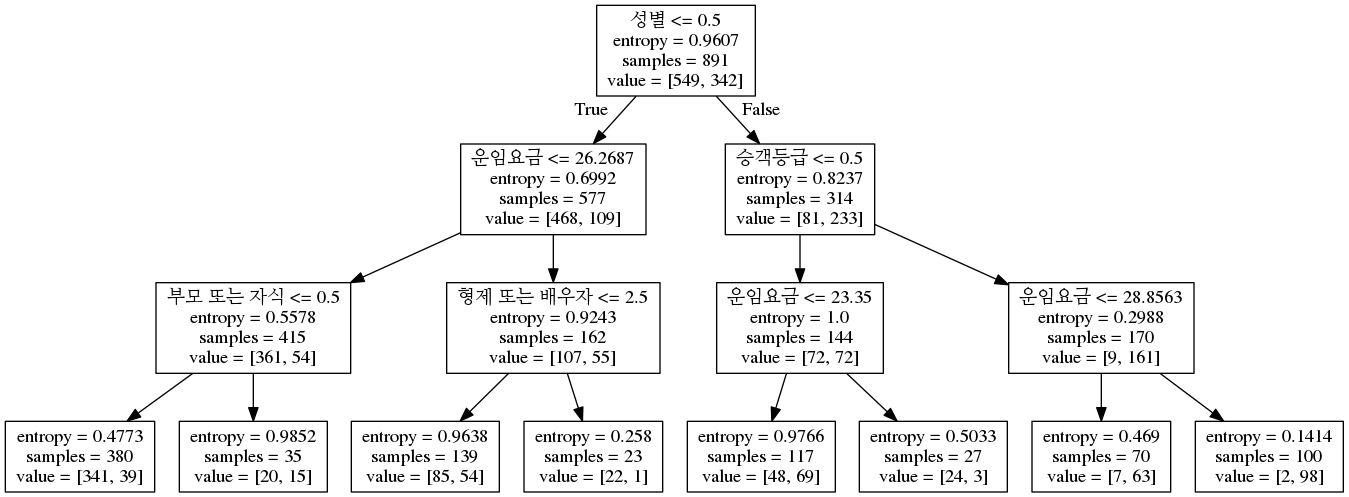

In [3]:
clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf = clf.fit(train_x, train_y)

f = StringIO()
tree.export_graphviz(clf, out_file=f, 
                     feature_names=(u'승객등급', u'성별',  u'나이', u'형제 또는 배우자', 
                                    u'부모 또는 자식', u'운임요금'))
graph = pydot.graph_from_dot_data(f.getvalue())[0]
graph.write_png('/tmp/titanic_decision_tree.png')
Image(filename='/tmp/titanic_decision_tree.png')

In [47]:
# np.count_nonzero 는 True의 값을 Count합니다.
print 'Accuracy:', np.count_nonzero(clf.predict(test_x) == test_y)/float(test_x.shape[0])

Accuracy: 0.985645933014
